# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π

## –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
import numpy as np
from keras import regularizers
from tensorflow.keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet import ResNet50
import pandas as pd


seed=12345



In [2]:
data = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
datagen = ImageDataGenerator()

In [4]:
datagen_flow = datagen.flow_from_directory(
    '/datasets/faces/',
    target_size=(150, 150), 
    batch_size=16,
    class_mode='sparse',
    seed=seed)

Found 7591 images belonging to 1 classes.


In [5]:
datagen_flow

In [6]:
datagen_flow.class_indices

{'final_files': 0}

In [7]:
data.head()

file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


<AxesSubplot:>

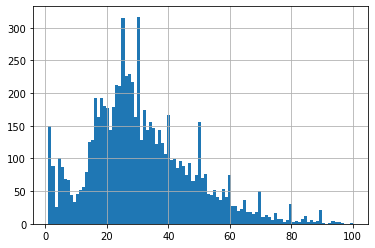

In [9]:
data['real_age'].hist(bins = 100)

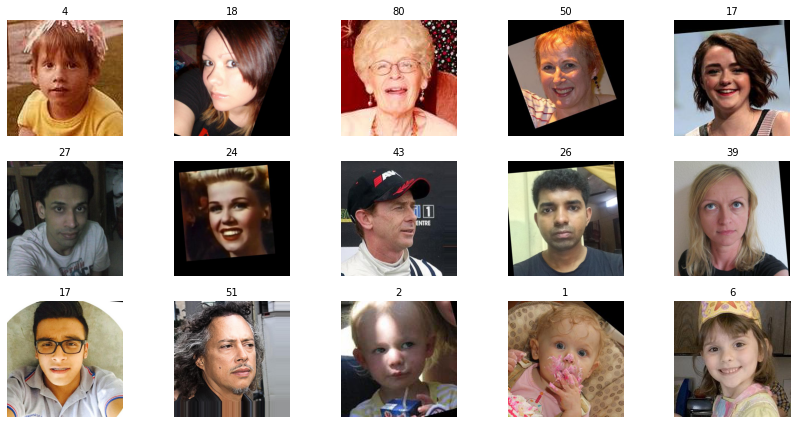

In [12]:
plt.figure(figsize=(12, 6))  

for i in range(15):
    file_name = data.loc[i, 'file_name']
    age = data.loc[i, 'real_age']  # –ü–æ–ª—É—á–∞–µ–º –≤–æ–∑—Ä–∞—Å—Ç
    image = Image.open('/datasets/faces/final_files/' + file_name)
    
    plt.subplot(3, 5, i + 1)  
    plt.imshow(np.array(image))
    plt.axis('off')
    plt.title(f'{int(age)}', fontsize=10)  # –ü–æ–¥–ø–∏—Å—å —Å –≤–æ–∑—Ä–∞—Å—Ç–æ–º

plt.tight_layout()
plt.show()

<div class="alert alert-warning">
<font size="4"><b>‚ö†Ô∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
–î–ª—è –æ—Ü–µ–Ω–∫–∏ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç–∏ —Ä–∞–∑–º–µ—Ç–∫–∏ –≤–æ–∑—Ä–∞—Å—Ç–æ–≤ –±—ã–ª–æ –± –Ω–µ–ø–ª–æ—Ö–æ –ø–æ–¥–ø–∏—Å–∞—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —É–∫–∞–∑–∞–Ω–Ω—ã–º –≤–æ–∑—Ä–∞—Å—Ç–æ–º —á–µ–ª–æ–≤–µ–∫–∞ –Ω–∞ —Ñ–æ—Ç–æ

<div class="alert alert-info"> <b>üéì –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞:</b> 
–î–∞, –∫–æ–Ω–µ—á–Ω–æ, –¥–∞–≤–∞–π –Ω–∞ "—Ç—ã". –ü—Ä–∏—è—Ç–Ω–æ –ø–æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è. 
</div>

<div class="alert alert-success">
<font size="4"><b>‚úîÔ∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
–í—Ä–æ–¥–µ —É–∂–µ –ø–æ–∑–Ω–∞–∫–æ–º–∏–ª–∏—Å—å üòÅ

–ó–¥–æ—Ä–æ–≤–æ, —á—Ç–æ –æ–±—Ä–∞—â–∞–µ—à—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–µ —Ç–æ–ª—å–∫–æ –Ω–∞ –∫—Ä–∞—Å–Ω—ã–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ :)

## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

–ü–µ—Ä–µ–Ω–µ—Å–∏—Ç–µ —Å—é–¥–∞ –∫–æ–¥ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –∏ –µ—ë —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤—ã–≤–æ–¥–∞ –Ω–∞ —ç–∫—Ä–∞–Ω.


(–ö–æ–¥ –≤ —ç—Ç–æ–º —Ä–∞–∑–¥–µ–ª–µ –∑–∞–ø—É—Å–∫–∞–µ—Ç—Å—è –≤ –æ—Ç–¥–µ–ª—å–Ω–æ–º GPU-—Ç—Ä–µ–Ω–∞–∂—ë—Ä–µ, –ø–æ—ç—Ç–æ–º—É –æ—Ñ–æ—Ä–º–ª–µ–Ω –Ω–µ –∫–∞–∫ —è—á–µ–π–∫–∞ —Å –∫–æ–¥–æ–º, –∞ –∫–∞–∫ –∫–æ–¥ –≤ —Ç–µ–∫—Å—Ç–æ–≤–æ–π —è—á–µ–π–∫–µ)

```python

def load_train(path):

    df = pd.read_csv(f'{path}/labels.csv')
    
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25,
        horizontal_flip=True,
        rotation_range=90,
        width_shift_range=0.2
    )

    train_generator = datagen.flow_from_dataframe(
        dataframe=df,
        directory=f'{path}/final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345
    )
    
    return train_generator
  
def load_test(path):
    df = pd.read_csv(f'{path}/labels.csv')

    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25
    )

    val_generator = datagen.flow_from_dataframe(
        dataframe=df,
        directory=f'{path}/final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345
    )
    
    return val_generator
        
def create_model(input_shape):
        
    backbone = ResNet50(input_shape=input_shape,
                    weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                    include_top=False)
    
    backbone.trainable = False
    
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1,  activation='relu'))

    optimizer = Adam(lr=1e-4)

    model.compile(loss='MSE', optimizer=optimizer, metrics=['mae'])

    return model



def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):
                
    model.fit(train_data,
            validation_data=test_data,
            batch_size=batch_size, epochs=epochs,
            steps_per_epoch=steps_per_epoch,
            validation_steps=validation_steps,
            verbose=2)
    return model

```

```

Train for 356 steps, validate for 119 steps
Epoch 1/10
356/356 - 72s - loss: 627.1962 - mae: 19.8052 - val_loss: 831.0136 - val_mae: 23.9524
Epoch 2/10
356/356 - 63s - loss: 174.8344 - mae: 10.2530 - val_loss: 215.7864 - val_mae: 11.4725
Epoch 3/10
356/356 - 64s - loss: 149.7035 - mae: 9.5581 - val_loss: 127.7124 - val_mae: 8.9641
Epoch 4/10
356/356 - 63s - loss: 136.6185 - mae: 9.1057 - val_loss: 124.6198 - val_mae: 8.8246
Epoch 5/10
356/356 - 64s - loss: 126.2596 - mae: 8.7092 - val_loss: 112.4990 - val_mae: 8.1964
Epoch 6/10
356/356 - 64s - loss: 118.6043 - mae: 8.4384 - val_loss: 123.0059 - val_mae: 8.6991
Epoch 7/10
356/356 - 64s - loss: 109.3869 - mae: 8.1154 - val_loss: 120.8467 - val_mae: 8.4990
Epoch 8/10
356/356 - 64s - loss: 102.6626 - mae: 7.8497 - val_loss: 110.0040 - val_mae: 7.9554
Epoch 9/10
356/356 - 65s - loss: 96.6363 - mae: 7.6499 - val_loss: 115.5282 - val_mae: 8.1800
Epoch 10/10
356/356 - 65s - loss: 90.7209 - mae: 7.4143 - val_loss: 111.1913 - val_mae: 7.8922
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 9s - loss: 111.1913 - mae: 7.8922
```

## –ê–Ω–∞–ª–∏–∑ –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏

–ù–∞–ø–∏—à–∏—Ç–µ –≤—ã–≤–æ–¥—ã –∑–¥–µ—Å—å

### –í—ã–≤–æ–¥:

#### –ê–Ω–∞–ª–∏–∑ –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏

–í —Ö–æ–¥–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–µ–∫—Ç–∞ –±—ã–ª–∞ —É—Å–ø–µ—à–Ω–æ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∞ –∏ –æ–±—É—á–µ–Ω–∞ —Å–≤–µ—Ä—Ç–æ—á–Ω–∞—è –Ω–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã ResNet50. –î–ª—è —Ä–∞–±–æ—Ç—ã —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª—Å—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä ImageDataGenerator —Å –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–µ–π, —á—Ç–æ –ø–æ–∑–≤–æ–ª–∏–ª–æ –ø–æ–≤—ã—Å–∏—Ç—å –æ–±–æ–±—â–∞—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏. –ë—ã–ª–∏ —Ä–∞–∑–¥–µ–ª–µ–Ω—ã –æ–±—É—á–∞—é—â–∞—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º flow_from_dataframe –Ω–∞ –æ—Å–Ω–æ–≤–µ CSV-—Ñ–∞–π–ª–∞ —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –≤–æ–∑—Ä–∞—Å—Ç–∞–º–∏.

–û–±—É—á–µ–Ω–∏–µ –ø—Ä–æ–≤–æ–¥–∏–ª–æ—Å—å –≤ —Ç–µ—á–µ–Ω–∏–µ 10 —ç–ø–æ—Ö. –£–∂–µ –Ω–∞—á–∏–Ω–∞—è —Å —Ç—Ä–µ—Ç—å–µ–π —ç–ø–æ—Ö–∏ –Ω–∞–±–ª—é–¥–∞–ª–æ—Å—å –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ —Å–Ω–∏–∂–µ–Ω–∏–µ MAE –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏, –∏ –ø–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏–∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª—å –¥–æ—Å—Ç–∏–≥–ª–∞:

MAE –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 7.89

–≠—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è–µ—Ç –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–º—É —É—Å–ª–æ–≤–∏—é: MAE ‚â§ 8, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç —É—Å–ø–µ—à–Ω–æ–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏ –ø–æ –æ—Ü–µ–Ω–∫–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ –ª—é–¥–µ–π –ø–æ —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è–º. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –º–æ–¥–µ–ª—å –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª–∞ —Ö–æ—Ä–æ—à—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –∫ –æ–±–æ–±—â–µ–Ω–∏—é –∏ –º–æ–∂–µ—Ç –±—ã—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∞ –∫–∞–∫ –æ—Å–Ω–æ–≤–∞ –¥–ª—è —Ä–µ–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –æ—Ü–µ–Ω–∫–∏ –≤–æ–∑—Ä–∞—Å—Ç–∞.

- [x]  Jupyter Notebook –æ—Ç–∫—Ä—ã—Ç
- [ ]  –í–µ—Å—å –∫–æ–¥ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –±–µ–∑ –æ—à–∏–±–æ–∫
- [ ]  –Ø—á–µ–π–∫–∏ —Å –∫–æ–¥–æ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –≤ –ø–æ—Ä—è–¥–∫–µ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏—è
- [ ]  –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –≤—ã–ø–æ–ª–Ω–µ–Ω
- [ ]  –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö –ø–µ—Ä–µ–Ω–µ—Å–µ–Ω—ã –≤ —Ñ–∏–Ω–∞–ª—å–Ω—É—é —Ç–µ—Ç—Ä–∞–¥—å
- [ ]  MAE –º–æ–¥–µ–ª–∏ –Ω–µ –±–æ–ª—å—à–µ 8
- [ ]  –ö–æ–¥ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ —Å–∫–æ–ø–∏—Ä–æ–≤–∞–Ω –≤ —Ñ–∏–Ω–∞–ª—å–Ω—É—é —Ç–µ—Ç—Ä–∞–¥—å
- [ ]  –†–µ–∑—É–ª—å—Ç–∞—Ç –≤—ã–≤–æ–¥–∞ –º–æ–¥–µ–ª–∏ –Ω–∞ —ç–∫—Ä–∞–Ω –ø–µ—Ä–µ–Ω–µ—Å—ë–Ω –≤ —Ñ–∏–Ω–∞–ª—å–Ω—É—é —Ç–µ—Ç—Ä–∞–¥—å
- [ ]  –ü–æ –∏—Ç–æ–≥–∞–º –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ —Å–¥–µ–ª–∞–Ω—ã –≤—ã–≤–æ–¥—ã